**ADIDAS SALES DATA: EDA & ANALYTICS**

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_excel("/content/AdidasSalesdata.xlsx")

In [ ]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Gender Type,Product Category,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2021-10-26,Northeast,Pennsylvania,Philadelphia,Men,Apparel,55,125,68750.0,24062.5,0.35,Outlet
1,Foot Locker,1185732,2021-10-27,Northeast,Pennsylvania,Philadelphia,Women,Apparel,45,225,101250.0,30375.0,0.30,Outlet
2,Foot Locker,1185732,2021-10-28,Northeast,Pennsylvania,Philadelphia,Men,Street Footwear,45,475,213750.0,117562.5,0.55,Outlet
3,Foot Locker,1185732,2021-10-29,Northeast,Pennsylvania,Philadelphia,Men,Athletic Footwear,45,125,56250.0,19687.5,0.35,Outlet
4,Foot Locker,1185732,2021-10-30,Northeast,Pennsylvania,Philadelphia,Women,Street Footwear,35,175,61250.0,24500.0,0.40,Outlet


In [ ]:
# Check for missing values
print(df.isnull().sum())

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Gender Type         0
Product Category    0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Gender Type       9648 non-null   object        
 7   Product Category  9648 non-null   object        
 8   Price per Unit    9648 non-null   int64         
 9   Units Sold        9648 non-null   int64         
 10  Total Sales       9648 non-null   float64       
 11  Operating Profit  9648 non-null   float64       
 12  Operating Margin  9648 non-null   float64       
 13  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), fl

In [ ]:
df.describe()

,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,2021-05-10 15:20:44.776119552,45.216625,256.930037,93273.437500,34425.244761,0.422991
min,1.128299e+06,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,2021-02-17 00:00:00,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,2021-06-04 00:00:00,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,2021-09-16 00:00:00,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,2021-12-31 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,0.800000
std,2.636038e+04,NaN,14.705397,214.252030,141916.016727,54193.113713,0.097197


In [ ]:
# Convert 'Invoice Date' to datetime
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

In [ ]:
# Extract additional time-based features
df['Year'] = df['Invoice Date'].dt.year
df['Month'] = df['Invoice Date'].dt.month
df['Day'] = df['Invoice Date'].dt.day
df['DayOfWeek'] = df['Invoice Date'].dt.dayofweek

In [ ]:
# Display data types and first few rows after preprocessing
print(df.dtypes)

Retailer                    object
Retailer ID                  int64
Invoice Date        datetime64[ns]
Region                      object
State                       object
City                        object
Gender Type                 object
Product Category            object
Price per Unit               int64
Units Sold                   int64
Total Sales                float64
Operating Profit           float64
Operating Margin           float64
Sales Method                object
Year                         int32
Month                        int32
Day                          int32
DayOfWeek                    int32
dtype: object


In [ ]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Gender Type,Product Category,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Year,Month,Day,DayOfWeek
0,Foot Locker,1185732,2021-10-26,Northeast,Pennsylvania,Philadelphia,Men,Apparel,55,125,68750.0,24062.5,0.35,Outlet,2021,10,26,1
1,Foot Locker,1185732,2021-10-27,Northeast,Pennsylvania,Philadelphia,Women,Apparel,45,225,101250.0,30375.0,0.30,Outlet,2021,10,27,2
2,Foot Locker,1185732,2021-10-28,Northeast,Pennsylvania,Philadelphia,Men,Street Footwear,45,475,213750.0,117562.5,0.55,Outlet,2021,10,28,3
3,Foot Locker,1185732,2021-10-29,Northeast,Pennsylvania,Philadelphia,Men,Athletic Footwear,45,125,56250.0,19687.5,0.35,Outlet,2021,10,29,4
4,Foot Locker,1185732,2021-10-30,Northeast,Pennsylvania,Philadelphia,Women,Street Footwear,35,175,61250.0,24500.0,0.40,Outlet,2021,10,30,5


**EXPLORATORY DATA ANALYSIS**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

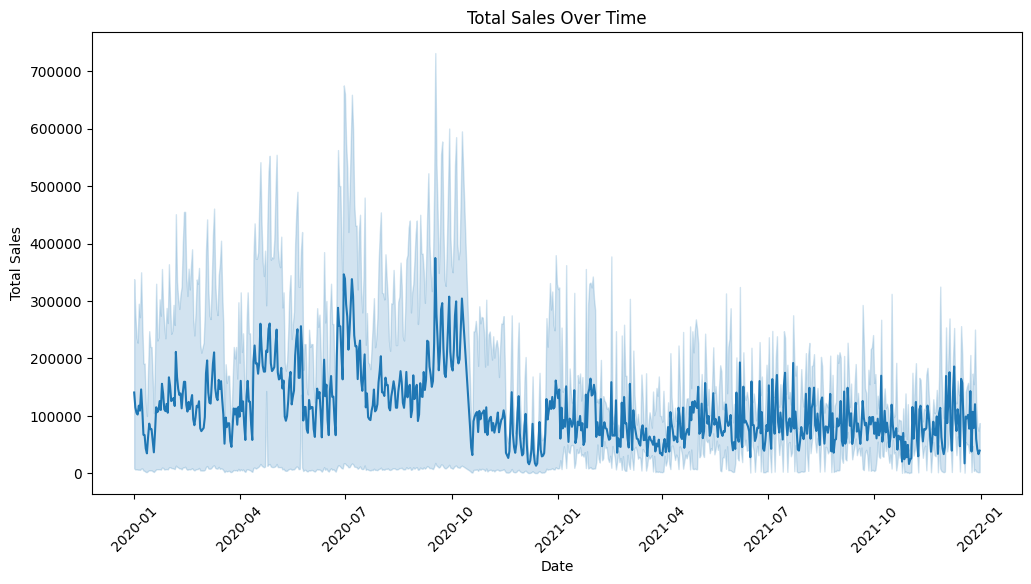

In [ ]:
#sales trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Invoice Date', y='Total Sales', data=df)
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

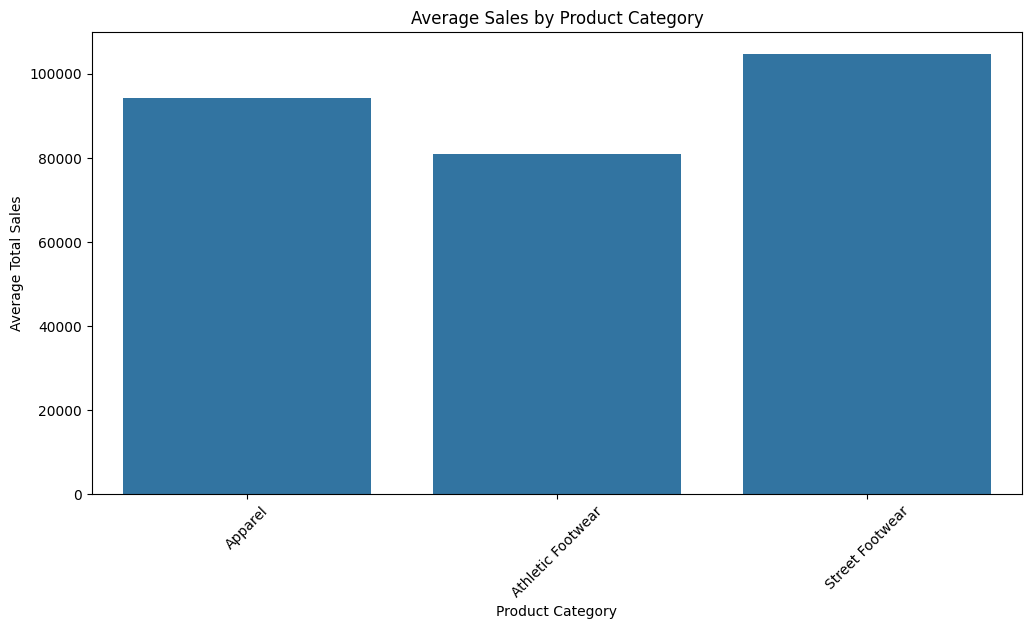

In [ ]:
# Calculate average total sales by product category
avg_sales_by_category = df.groupby('Product Category')['Total Sales'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Product Category', y='Total Sales', data=avg_sales_by_category)
plt.title('Average Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Total Sales')
plt.xticks(rotation=45)
plt.show()

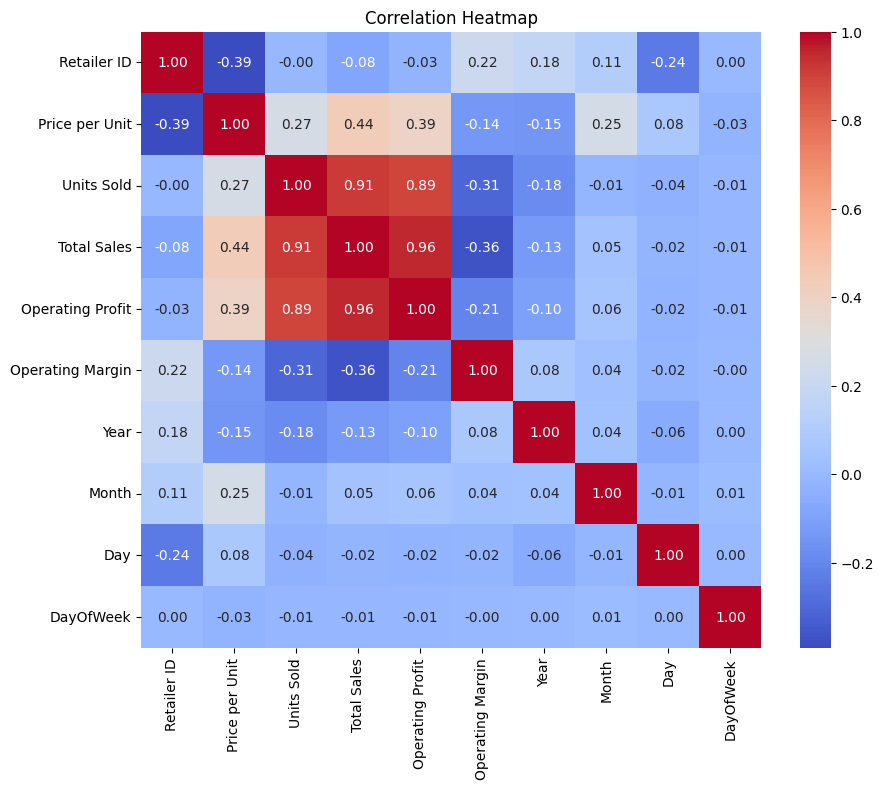

In [ ]:
# Select only numeric columns for correlation
numeric_data = df.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

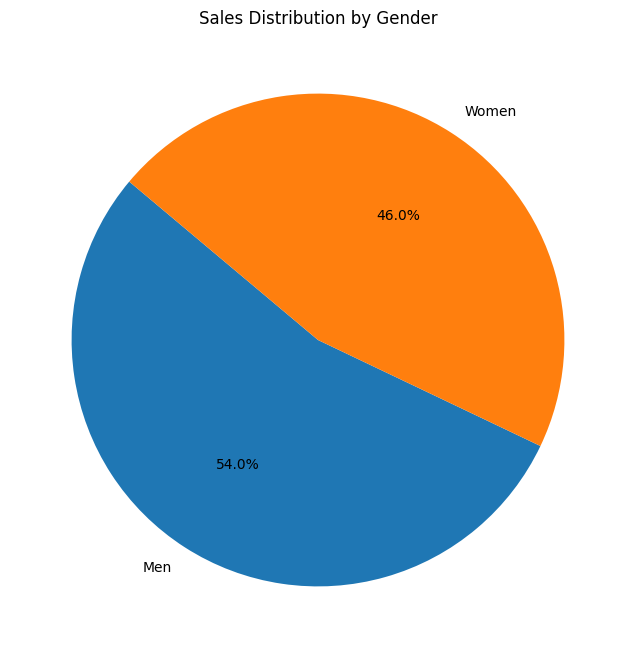

In [ ]:
# Group by Gender Type and calculate the sum of total sales
gender_sales = df.groupby('Gender Type')['Total Sales'].sum().reset_index()

# Plot pie chart for gender sales
plt.figure(figsize=(8, 8))
plt.pie(gender_sales['Total Sales'], labels=gender_sales['Gender Type'], autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Gender')
plt.show()

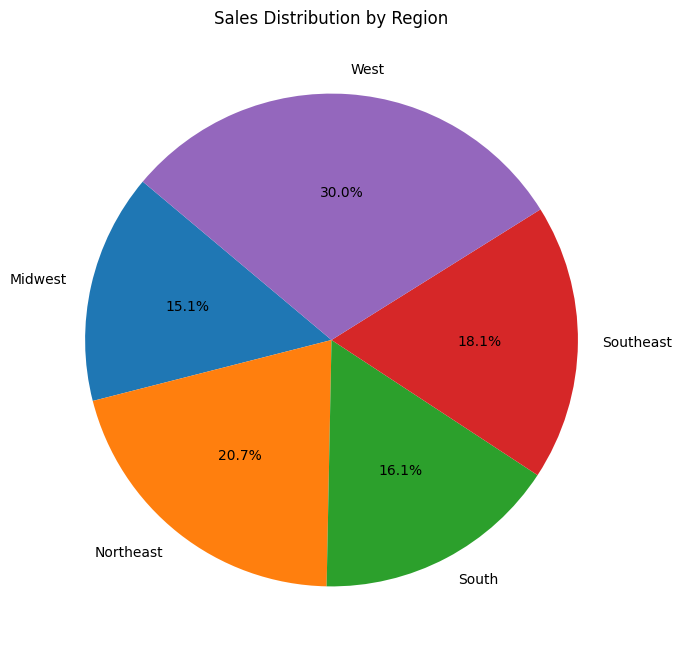

In [ ]:
# Group by Region and calculate the sum of total sales
region_sales = df.groupby('Region')['Total Sales'].sum().reset_index()

# Plot pie chart for region sales
plt.figure(figsize=(8, 8))
plt.pie(region_sales['Total Sales'], labels=region_sales['Region'], autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Region')
plt.show()

**MACHINE LEARNING MODEL**

In [ ]:
# Prepare the data for modeling
features = ['Price per Unit', 'Units Sold', 'Operating Margin', 'Year', 'Month', 'Day', 'DayOfWeek']
X = df[features]
y = df['Total Sales']

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Random Forest - Mean Squared Error: {mse}, R-squared: {r2}')

Random Forest - Mean Squared Error: 140153923.43630263, R-squared: 0.9930931977556073


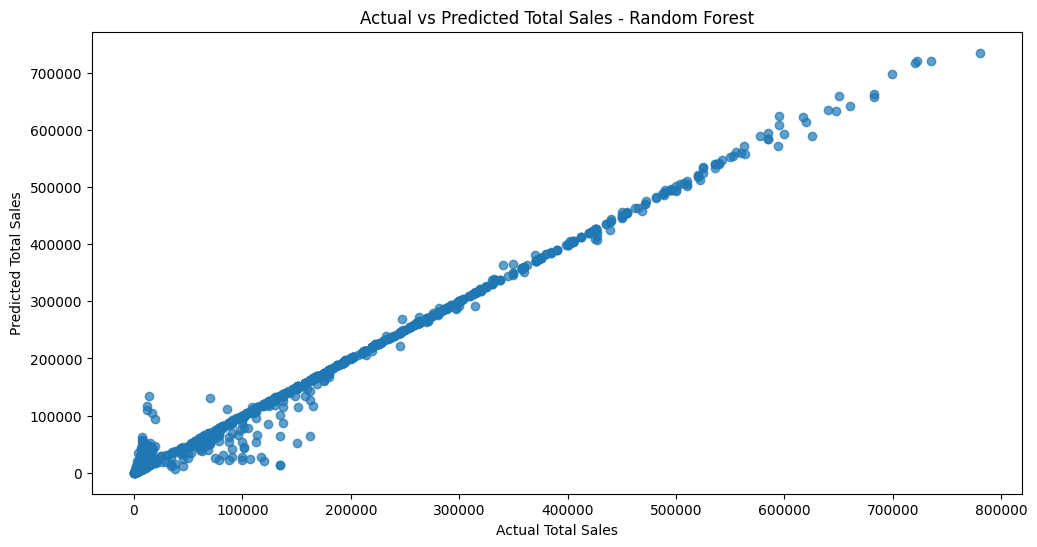

In [ ]:
# Plot actual vs predicted sales
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Total Sales')
plt.ylabel('Predicted Total Sales')
plt.title('Actual vs Predicted Total Sales - Random Forest')
plt.show()

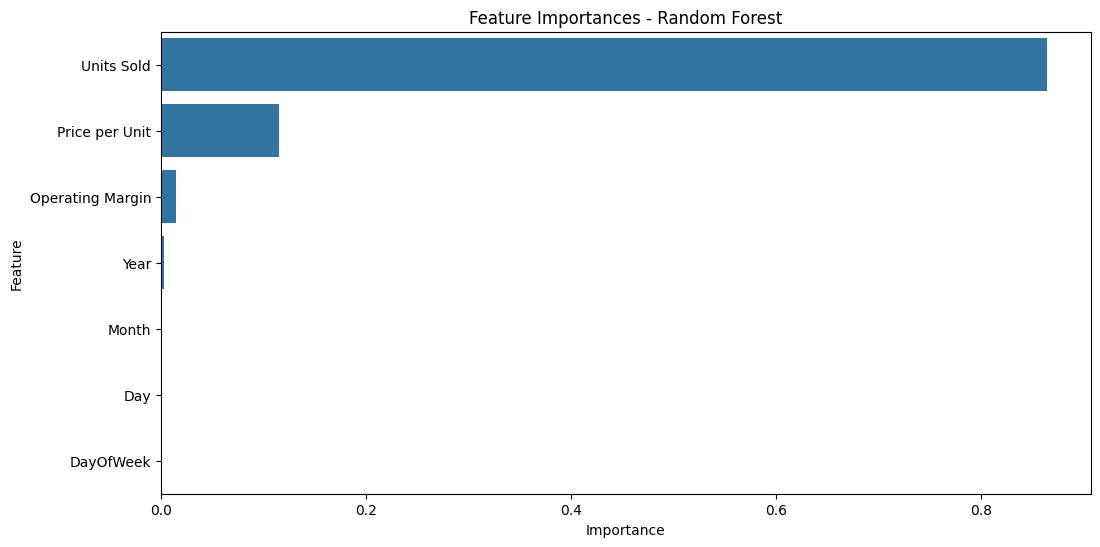

In [ ]:
# Feature Importance
feature_importances = rf_model.feature_importances_
features_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importances - Random Forest')
plt.show()

In [ ]:
from google.colab import files
df.to_excel('sales_processed_data.xlsx', index=False)
files.download('sales_processed_data.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>